## TASK 1

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np

In [ ]:
dataset = keras.datasets.mnist.load_data()

train_df = pd.DataFrame(list(zip(dataset[0][0], dataset[0][1])), columns =['image', 'label'])

test_df = pd.DataFrame(list(zip(dataset[1][0], dataset[1][1])), columns =['image', 'label'])

In [3]:
#Part_1 

train_df.to_csv('train.csv', index=False)

test_df.to_csv('test.csv', index=False)


In [61]:
#Part_2

# Reading train and test dataframes

train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

# Conversion of dataframes to numpy arrays

train_images = np.array(train_df['image'])
train_labels = np.array(train_df['label'])

test_images = np.array(test_df['image'])
test_labels = np.array(test_df['label'])

# Conversion into original format

train_dataset = (train_images , train_labels)

test_dataset = (test_images , test_labels)

new_dataset = (train_dataset, test_dataset)

print(f"New Dataset type: {type(new_dataset)}\nTrain Dataset type: {type(train_dataset)}\nTest Dataset type: {type(train_dataset)}")

New Dataset type: <class 'tuple'>
Train Dataset type: <class 'tuple'>
Test Dataset type: <class 'tuple'>


## TASK 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Reading the file 
df = pd.read_csv('online_retail_II.csv')

In [3]:
# Extracting the first ten rows from the data
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
df.shape

(525461, 8)

In [6]:
# Checking where the null values are present in the given data 
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [8]:
df[df['Description'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,12/1/2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,12/1/2009 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,12/1/2009 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,12/2/2009 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,12/2/2009 12:42,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,12/9/2010 15:58,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,12/9/2010 15:58,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,12/9/2010 17:17,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,12/9/2010 17:17,0.0,NaN,United Kingdom


In [9]:
# Dropping all the rows containing null values in the Description column
df.dropna(subset=['Description'], inplace = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [10]:
# Dropping all the rows containing null values in the Customer ID column
df.dropna(subset=['Customer ID'], inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [11]:
# All missing values have been handeled now
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# Checking the duplicates values now in the data
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,12/1/2009 11:34,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,12/1/2009 11:34,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,12/1/2009 11:34,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,12/9/2010 13:03,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,12/9/2010 13:24,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,12/9/2010 16:52,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,12/9/2010 18:09,1.25,17965.0,United Kingdom


In [13]:
df.duplicated().sum()

6771

In [14]:
# Dropping all the duplicated values
df.drop_duplicates(inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [15]:
# All duplicates values have been dropped
df.duplicated().sum()

0

In [16]:
# Checking which of the product has no price
df[df['Price']<=0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,12/2/2009 13:34,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,12/3/2009 11:19,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,12/7/2009 16:38,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,12/8/2009 15:25,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,12/8/2009 15:25,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,12/15/2009 13:49,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,12/18/2009 14:22,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,1/6/2010 14:54,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,1/8/2010 10:43,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,1/15/2010 12:43,0.0,16858.0,United Kingdom


In [17]:
df[df['Price']<=0].shape


(31, 8)

In [18]:
# Dropped the products with 0 price
df.drop(df[df['Price']<=0].index, inplace=True)
df[df['Price']<=0].shape


(0, 8)

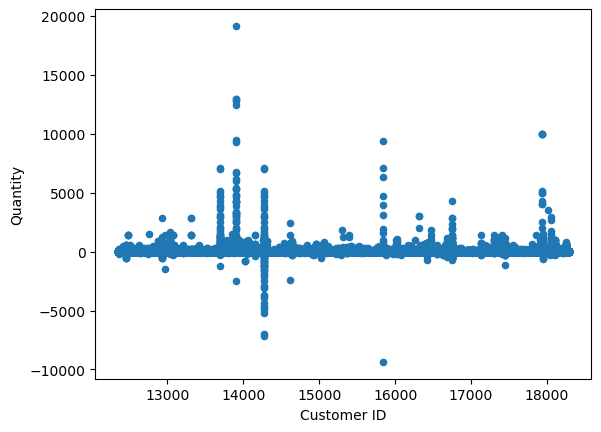

In [19]:
# Analyzing the outliers in Quantity column
df.plot(x = 'Customer ID', y= 'Quantity', kind = 'scatter')
plt.show()

In [20]:
df.sort_values(by='Quantity', inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,9/28/2010 11:02,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,9/28/2010 11:02,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,9/28/2010 11:02,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,9/28/2010 11:02,0.10,14277.0,France
...,...,...,...,...,...,...,...,...
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,3/17/2010 13:09,0.10,13902.0,Denmark


In [21]:
# Dropped the outliers with respect to the Quantity column
df.drop(df.iloc[:1].index, axis = 0, inplace = True)
df.drop(df.iloc[-1:].index, axis = 0, inplace = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,9/28/2010 11:02,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,9/28/2010 11:02,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,9/28/2010 11:02,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,9/28/2010 11:02,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,9/28/2010 11:02,0.07,14277.0,France
...,...,...,...,...,...,...,...,...
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,3/23/2010 15:36,0.25,17940.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.10,13902.0,Denmark


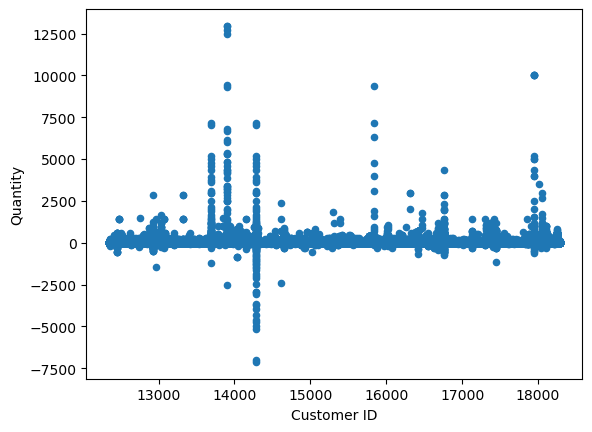

In [22]:
# Outliers from the Quantity column has been dropped
df.plot(x = 'Customer ID', y= 'Quantity', kind = 'scatter')
plt.show()

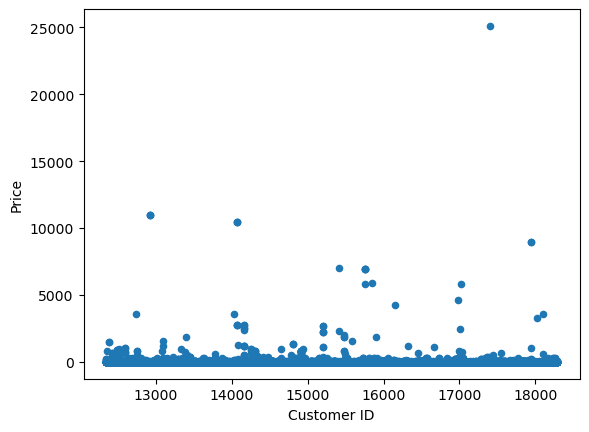

In [23]:
# Now analyzing the outliers from the Price column
df.plot(x = 'Customer ID', y= 'Price', kind = 'scatter')
plt.show()

In [24]:
# Dropping the outliers of the Price column
df.drop(df['Price'].idxmax(), axis=0, inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,9/28/2010 11:02,0.08,14277.0,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,9/28/2010 11:02,0.13,14277.0,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,9/28/2010 11:02,0.08,14277.0,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,9/28/2010 11:02,0.10,14277.0,France
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,9/28/2010 11:02,0.07,14277.0,France
...,...,...,...,...,...,...,...,...
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,3/23/2010 15:36,0.25,17940.0,United Kingdom
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.10,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.10,13902.0,Denmark


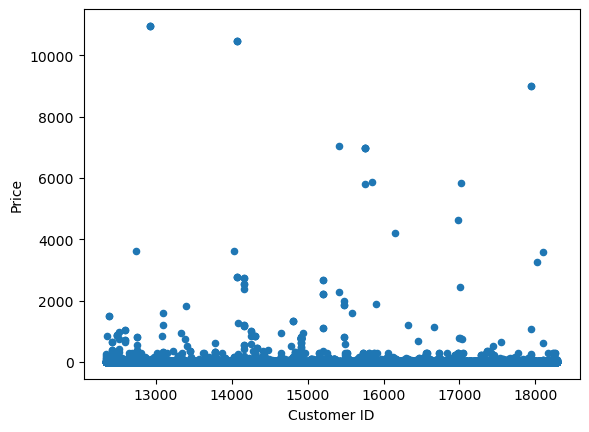

In [25]:
df.plot(x = 'Customer ID', y= 'Price', kind = 'scatter')
plt.show()

In [26]:
# Creating a column named as Total Price describing the total purchase of a customer by product
df['Total Price'] = df['Quantity']* df['Price']
df.rename(columns={"Price": "Unit Price"}, inplace=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Unit Price,Customer ID,Country,Total Price
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,9/28/2010 11:02,0.08,14277.0,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,9/28/2010 11:02,0.13,14277.0,France,-911.04
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,9/28/2010 11:02,0.08,14277.0,France,-414.72
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,9/28/2010 11:02,0.10,14277.0,France,-499.20
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,9/28/2010 11:02,0.07,14277.0,France,-332.64


In [27]:
df['Country'].unique()


array(['France', 'Denmark', 'United Kingdom', 'Spain', 'EIRE',
       'Netherlands', 'Channel Islands', 'Sweden', 'Cyprus', 'Japan',
       'United Arab Emirates', 'Portugal', 'Germany', 'Switzerland',
       'Korea', 'Austria', 'Poland', 'Belgium', 'USA', 'Australia',
       'Italy', 'Unspecified', 'Greece', 'Finland', 'Malta', 'Norway',
       'Brazil', 'Nigeria', 'RSA', 'Thailand', 'West Indies', 'Israel',
       'Bahrain', 'Singapore', 'Canada', 'Iceland', 'Lithuania'],
      dtype=object)

In [28]:
analyze = df.groupby('Country')['Total Price'].sum()
analyze

Country
Australia                 30051.800
Austria                   13023.280
Bahrain                     805.970
Belgium                   22644.030
Brazil                      268.270
Canada                     1216.660
Channel Islands           21367.320
Cyprus                    11173.800
Denmark                   45057.750
EIRE                     328234.260
Finland                    7187.710
France                   129665.480
Germany                  195920.421
Greece                    14284.970
Iceland                    1323.320
Israel                     3199.400
Italy                     13774.390
Japan                      8435.960
Korea                       949.820
Lithuania                  4892.680
Malta                      2686.750
Netherlands              263861.760
Nigeria                     140.390
Norway                     4079.570
Poland                     3314.950
Portugal                  23343.690
RSA                         931.430
Singapore           

### Checking the country where people are spending more

<AxesSubplot:xlabel='Country'>

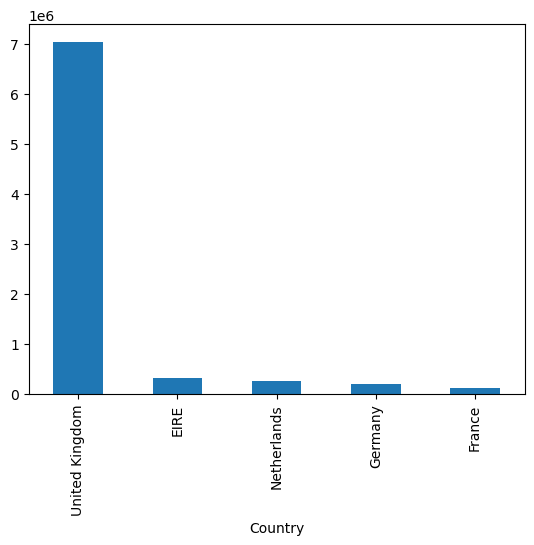

In [29]:
most_selling_countries = analyze.sort_values(ascending = False)
most_selling_countries[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

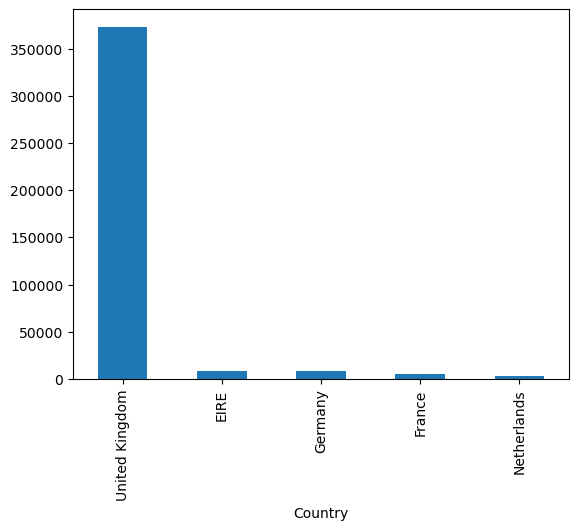

In [32]:
df.groupby('Country')['Quantity'].count().sort_values(ascending = False)[:5].plot(kind='bar')


In [40]:
# Converting the date and time format to original format to extract months and hours later
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Unit Price,Customer ID,Country,Total Price
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France,-570.24
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France,-911.04
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France,-414.72
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France,-499.20
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France,-332.64
...,...,...,...,...,...,...,...,...,...
135030,502269,21981,PACK OF 12 WOODLAND TISSUES,10000,2010-03-23 15:36:00,0.25,17940.0,United Kingdom,2500.00
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark,1248.00
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark,1274.40
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,1296.00


In [41]:
# Extracting the month 
df['Month'] =  df['InvoiceDate'].dt.month
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Unit Price,Customer ID,Country,Total Price,Month
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France,-570.24,9
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France,-911.04,9
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France,-414.72,9
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France,-499.20,9
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France,-332.64,9


### Checking the month in which people has spent more money, and by the graph November is the month when people purchase and spent more money

<AxesSubplot:xlabel='Month'>

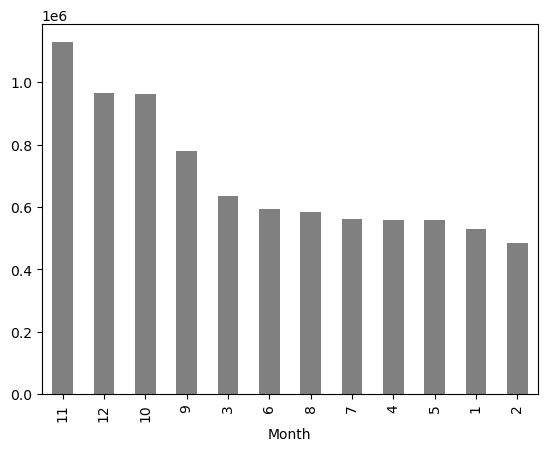

In [47]:
df.groupby('Month')['Total Price'].sum().sort_values(ascending = False).plot(kind='bar', color= 'gray')

### Customers who spent most money, TOP 5 CUSTOMERS

<AxesSubplot:xlabel='Customer ID'>

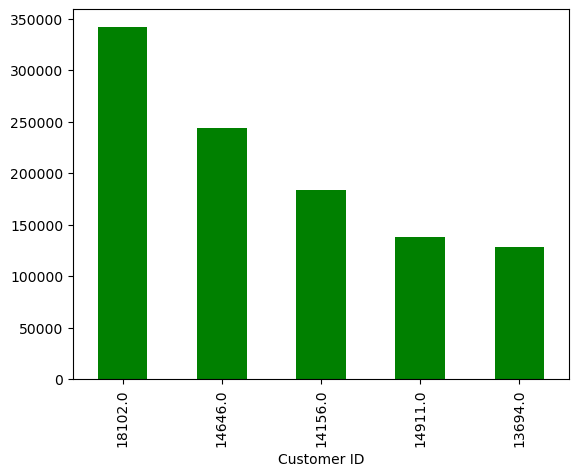

In [48]:
df.groupby('Customer ID')['Total Price'].sum().sort_values(ascending = False).iloc[:5].plot(kind='bar' ,color='green')


### TOP 20 MOST SOLD PRODUCTS

<AxesSubplot:xlabel='Description'>

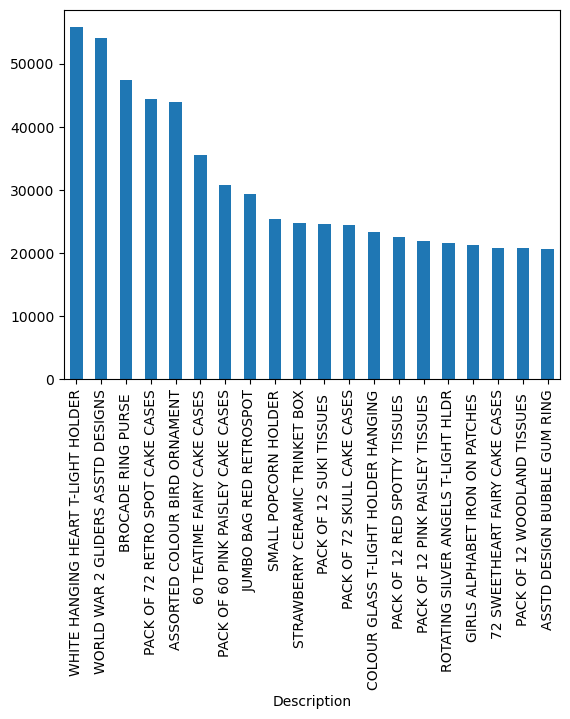

In [50]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).iloc[:20].plot(kind='bar')


In [51]:
# Extracting the hours from the Invoice Date column
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Unit Price,Customer ID,Country,Total Price,Month,Hour
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France,-570.24,9,11
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France,-911.04,9,11
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,2010-09-28 11:02:00,0.08,14277.0,France,-414.72,9,11
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,2010-09-28 11:02:00,0.10,14277.0,France,-499.20,9,11
359653,C524235,85110,BLACK SILVER FLOWER T-LIGHT HOLDER,-4752,2010-09-28 11:02:00,0.07,14277.0,France,-332.64,9,11


### Now analyzing the peak selling time and it turns out to be 11 am to 1pm

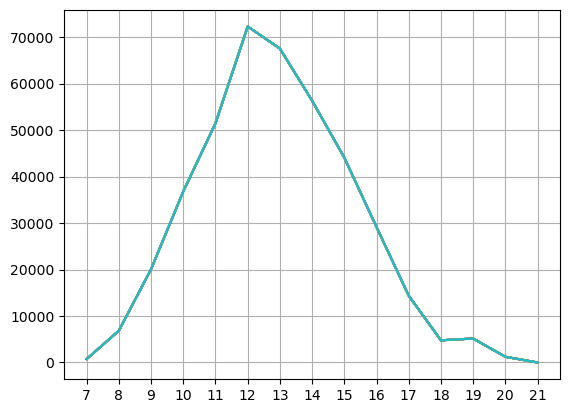

In [52]:
hours = [hour for hour, d in df.groupby('Hour')]
plt.plot(hours , df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()